In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ImageDataset import FolderImageDataset

# reload the imported files if changed
%load_ext autoreload
%autoreload 2

In [2]:
# 5.8k images
path2 = r"C:\Users\ЛФКИТ-3\Documents\quantTechLab\data\img2_stripes"
# 40k images
path3 = r"C:\Users\ЛФКИТ-3\Documents\quantTechLab\data\img3_stripes"
# 6.7k images, faster rotation
path4 = r"C:\Users\ЛФКИТ-3\Documents\quantTechLab\data\img4_stripes"


In [3]:
%%time
dst3 = FolderImageDataset(path4, end=1)

Wall time: 8.08 s


In [4]:
%%time 
intensity = np.zeros(len(dst3))
phases = np.zeros(len(dst3))

# this is not a pythonic way of iteration, see https://www.youtube.com/watch?v=OSGv2VnC0go  ~5-10 min
for i in range(len(dst3)):
    intensity[i] = dst3[i][0].mean()
    phases[i] = dst3[i][1] 


Wall time: 486 ms


In [5]:
%%time
intensity = np.mean(dst3.images, axis=(1,2,3))

Wall time: 364 ms


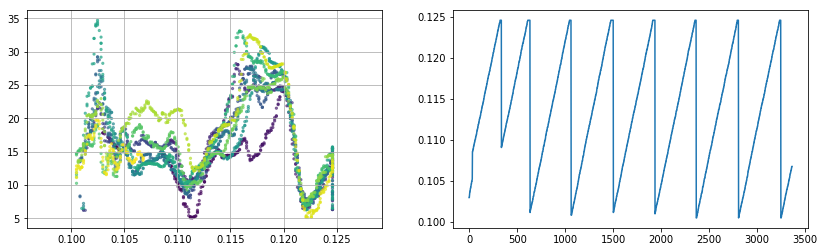

In [6]:
f,ax = plt.subplots(1,2, figsize=(14,4))
ax[0].grid()

ax[0].scatter(dst3.target, intensity, s=5, c=(range(len(dst3))), alpha=0.6)
ax[1].plot(dst3.target)

In [7]:
import sys
print("dataset takes", sys.getsizeof(dst3.images) / 10**6 ,"MB")


dataset takes 279.189648 MB


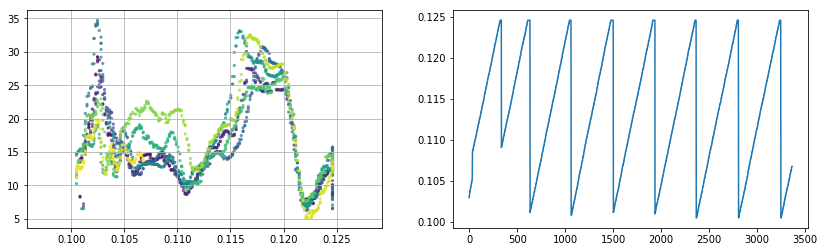

In [8]:
f,ax = plt.subplots(1,2, figsize=(14,4))
ax[0].grid()

ax[0].scatter(dst3.target[1000:], intensity[1000:], s=5, c=(range(len(dst3)-1000)), alpha=0.6)
ax[1].plot(dst3.target)

# PCA of dataset
1. Convert every image to 1d vector
2. make PCA
3. Analyse main components and described variance

In [65]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

N_COMPONENTS = 20

In [66]:
pca = PCA(N_COMPONENTS)

X = np.array(dst3.images).reshape(len(dst3), -1)


In [67]:
%%time
pca.fit(X)

Wall time: 21.4 s


PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Explained variance: 0.9848206679495959


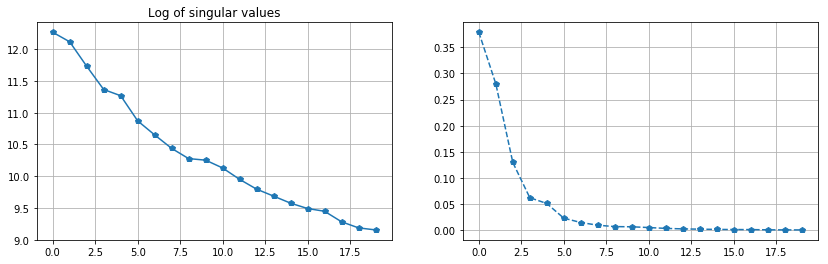

In [82]:
f,ax = plt.subplots(1,2, figsize=(14,4))
[x.grid() for x in ax]

ax[0].plot(np.log(pca.singular_values_),'p-')
ax[0].set_title("Log of singular values")
ax[1].plot(pca.explained_variance_ratio_, 'p--')
print("Explained variance:",sum(pca.explained_variance_ratio_))

Min, max 0.0 1.0
20


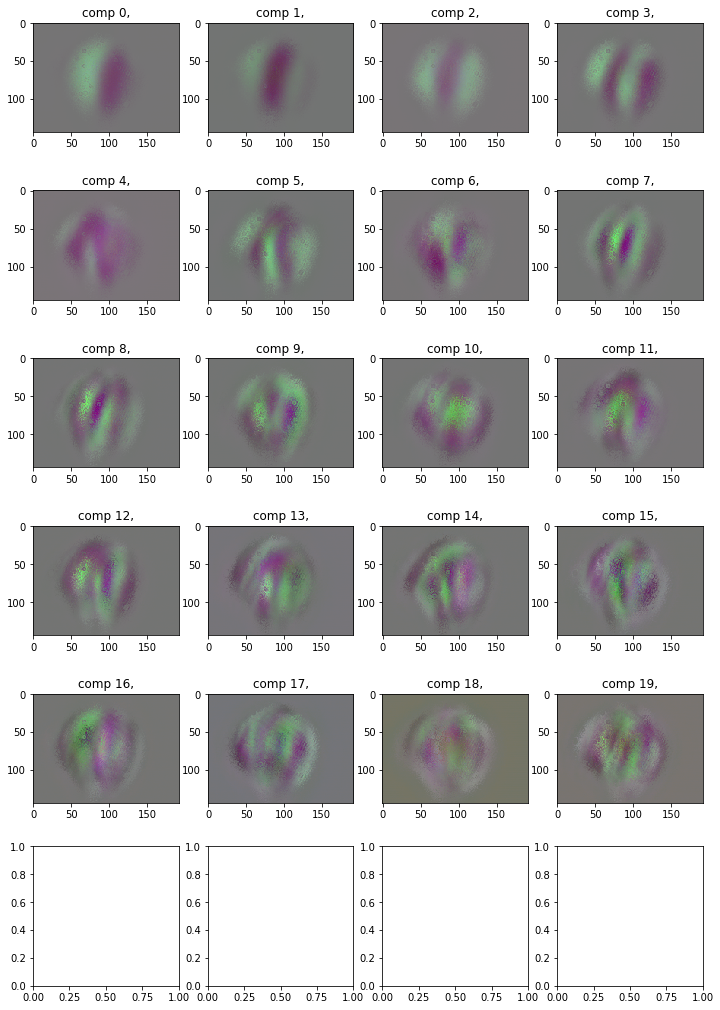

In [74]:
imshape = list(dst3[0][0].shape)
basis = pca.components_

meanimg = pca.mean_.reshape(imshape) 
imgs = basis.reshape(*[-1]+imshape)
print("Min, max", np.min(imgs),np.max(imgs))

imgs -=np.min(imgs)
imgs /= np.max(imgs)
_cols = 4
_rows = len(basis)//_cols + 1
print(len(basis))
f,axs = plt.subplots(_rows,_cols, figsize=(_cols*3,_rows*3))
axs = axs.reshape(-1)

for i, img, ax in zip(range(len(basis)), imgs, axs):
    ax.imshow( img )
    ax.set_title(f"comp {i},")

In [89]:
%%time
transformed = pca.transform(X)

Wall time: 2.08 s


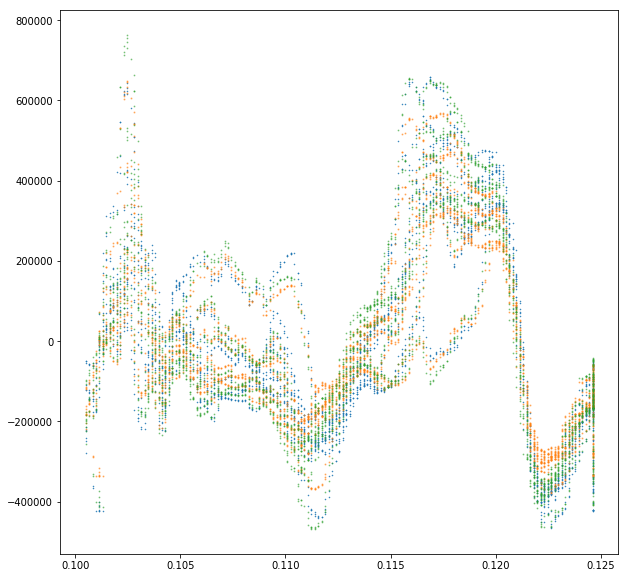

In [130]:
plt.figure(figsize=(10,10))
comp1 = transformed.T[0]
plt.plot( dst3.target, comp1, '.', markersize=1)
comp1 = transformed.T[1]
plt.plot( dst3.target, comp1, 'o', markersize=1, alpha=0.5)
comp1 = transformed.T[2]
plt.plot( dst3.target, comp1, 'p', markersize=1, alpha=0.5)

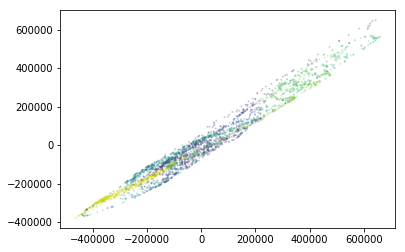

In [134]:

plt.scatter(*transformed.T[0:2], c=dst3.target,s=1, alpha=0.2)